# Pasos inicales, configuracion del entorno

In [ ]:
# %pip install -r requirements.txt

# Analisis UNA Serie Temporal

## Importacion de Datos
De momento hay que pegar el excel con los datos en la carpeta `data/`

TODO:
- Pendiente gestion de los paths entre windows y linux

In [1]:
# import src.importacion as importar
# ruta_archivo_a_importar = r"C:\Users\bogdan.stefan\Downloads\ppt_traspaso.pptx"
# importar.copiar_archivo(ruta_archivo_a_importar)

## Uso modelo

### Calculo tablas
 Analisis de una unica serie

In [14]:
import src.analisis_modelizacion as modelo
import numpy as np
import os

# Parametros a cumplimentar
ruta_del_archivo = './data/datos-2.xlsx'
hoja_excel = 'eurostock50'
cantidad_datos = 200

calibre_nodos = 0.0015          # Valor para discriminar NODOS  (val_p)
grupo_volatilidad = 20          # Valor a agrupar volatilidad 
grupo_entropia = 25             # Valor a agrupar la entropia

val_agrupacion = 25             # Valor para agrupar los datos en paquetes (val_r)
ind_agrupacion = 0              # 0 indica que val_r es el num de elementos de cada subgrupo, 
                                # 1 indica que val_r es el num de subgrupos. 

os.environ['nombre_evento'] = hoja_excel
# Instanciamos los datos como eventos
eve = modelo.evento(data_or_path=ruta_del_archivo, 
                    hoja=hoja_excel, 
                    numero_registros=cantidad_datos)
# print("evento:\n", eve)

# # Generamos la Serie X del evento se puede hacer de dos formas:
# #     1. Con la ruta del excel    
# tabla_1 = modelo.serie_x(data_or_path=ruta_del_archivo, 
#                          hoja=hoja_excel, 
#                          numero_registros=cantidad_datos, 
#                          val_p=calibre_nodos)

# #     2. Con el evento
tabla_1 = modelo.serie_x(data_or_path=eve, 
                         numero_registros=cantidad_datos, 
                         val_p=calibre_nodos)

tabla_1.volatilidad('value', grupo_volatilidad)
print('serie_x:\n', tabla_1)
# Metodo para calcular la Serie Y
tabla_2 = tabla_1.nodos()
# print('serie_y:\n', tabla_2)

# # Generamos la Serie Z del evento, al igual qeu la Serie X sepuede hacer de dos formas:
tabla_3 = modelo.serie_z(data_or_path=eve, 
                         numero_registros=cantidad_datos, 
                         val_p=calibre_nodos, 
                         val_r=val_agrupacion, 
                         boton=ind_agrupacion)
# # Creamos en la tabla_3 la columna entropia y le asignamos el valor calculado.
entropia = tabla_1.entropia_shannon(nombre_columna='value', grupo=grupo_entropia)
entropia_global = tabla_1.entropia_shannon('value')
masa = entropia/np.sum(entropia)
# print('entropia:', entropia_global)
tabla_3['entropy'] = entropia
tabla_3['mass'] = masa
print('serie_z:\n', tabla_3, type(tabla_3))

# Exportamos la tabla_3 a .csv por comodidad, no es necesario
tabla_3.to_csv('temp/tablas/serie_z.csv')



serie_x:
           time    value    normal   var_abs  ind_valp  norm_valp  var_valp  \
0   2023-06-16  4394.82  0.864540  0.000000     False   0.000000  0.000000   
1   2023-06-19  4362.38  0.858158  0.006382      True   0.858158  0.006382   
2   2023-06-20  4343.14  0.854374  0.003785      True   0.854374  0.003785   
3   2023-06-21  4322.75  0.850363  0.004011      True   0.850363  0.004011   
4   2023-06-22  4304.47  0.846767  0.003596      True   0.846767  0.003596   
..         ...      ...       ...       ...       ...        ...       ...   
195 2024-03-22  5031.15  0.989718  0.004163      True   0.989718  0.004163   
196 2024-03-25  5044.19  0.992283  0.002565      True   0.992283  0.002565   
197 2024-03-26  5064.18  0.996215  0.003932      True   0.996215  0.003932   
198 2024-03-27  5081.74  0.999670  0.003454      True   0.999670  0.003454   
199 2024-03-28  5083.42  1.000000  0.000330     False   0.000000  0.000000   

     volatility_20  
0              NaN  
1          

In [ ]:
print(np.sum(masa))

### Graficar resultados

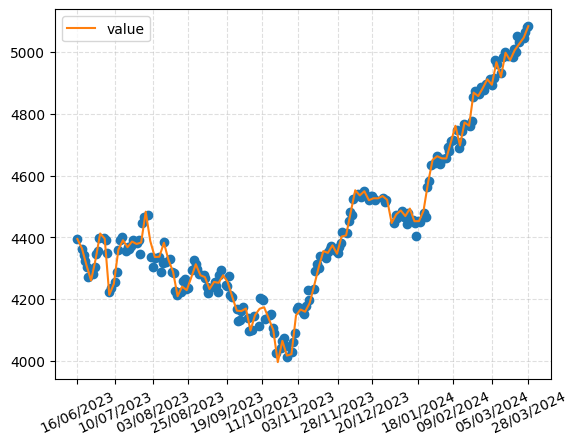

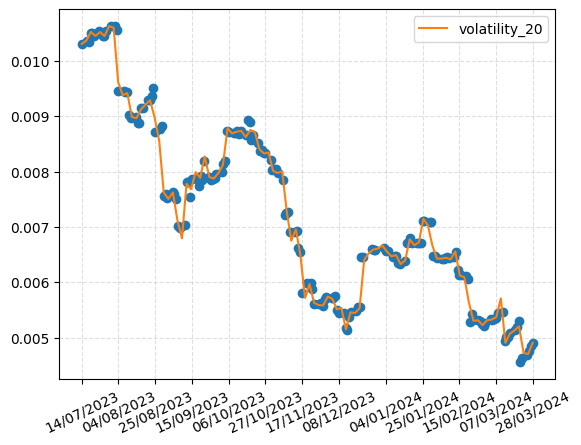

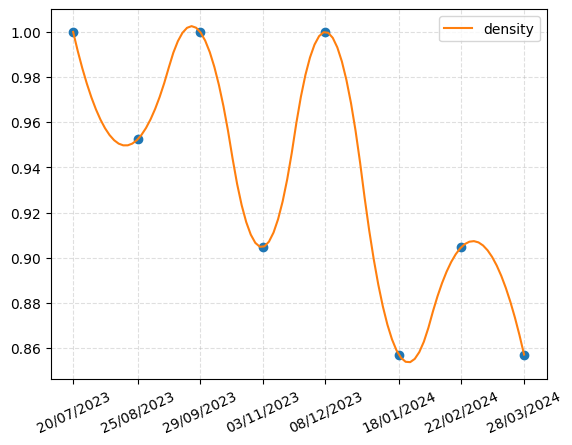

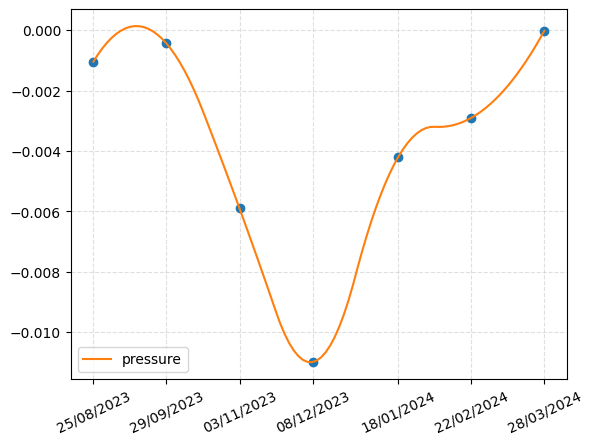

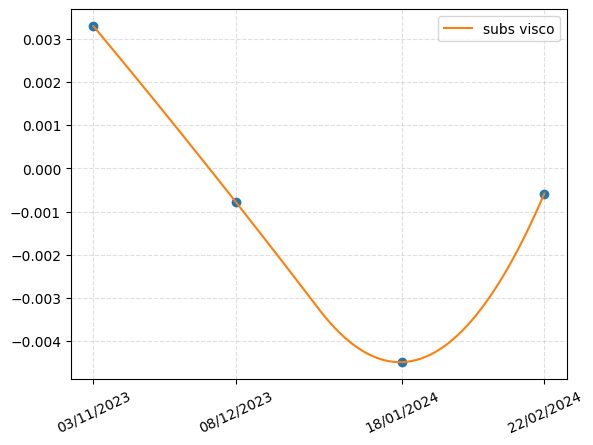

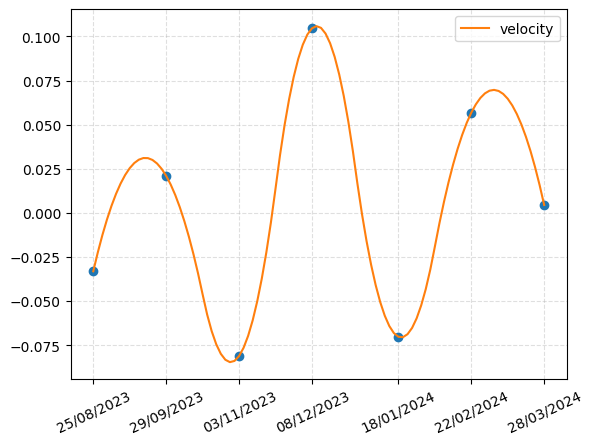

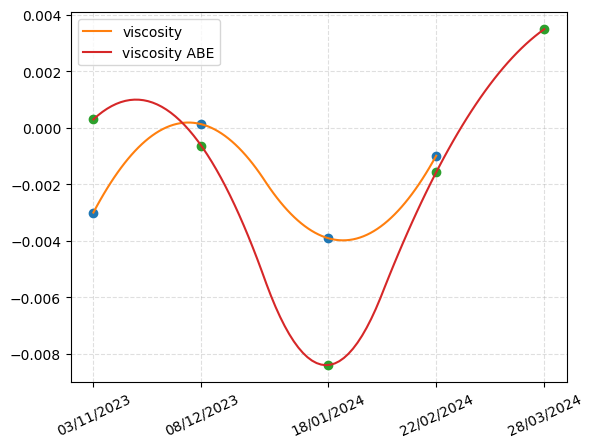

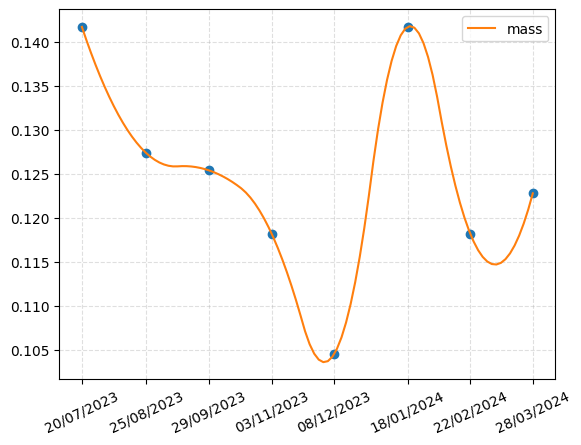

In [7]:
from src.graphic_generator import pinta

# pinta([tabla_1, tabla_3],[['value'],['viscosity', 'viscosity ABE']])
pinta([tabla_1],[['value']])
pinta([tabla_1],[['volatility_20']])
pinta([tabla_3],[['density']])
pinta([tabla_3],[['pressure']])
pinta([tabla_3],[['subs visco']])
pinta([tabla_3],[['velocity']])
pinta([tabla_3],[['viscosity', 'viscosity ABE']])
pinta(tablas=[tabla_3],columnas=[['mass']])

# Analisis Multivariable

In [6]:
# Cargamos y exportamos las tablas necesarias
import src.analisis_modelizacion as modelo
import numpy as np
import os

# Parametros a cumplimentar
cantidad_datos = 200

calibre_nodos = 0.002           # Valor para discriminar NODOS  (val_p)
val_agrupacion = 25             # Valor para agrupar los datos en paquetes
ind_agrupacion = 0              # 0 indica que val_r es el num de elementos de cada subgrupo, 
                                # 1 indica que val_r es el num de subgrupos. 

grupo_volatilidad = 20          # Valor a agrupar volatilidad 

lista_hojas_eventos = [
                        'ejemplo1_evento1',
                        'ejemplo1_evento2'
                    ]
ruta_del_archivo = './data/multi_variable.xlsx'
lista_masas = np.array([0.0000972430641073838, 0.0000068571])
lista_masas = lista_masas/lista_masas.sum()
for  i, hoja_excel in enumerate(lista_hojas_eventos):
    os.environ['nombre_evento'] = hoja_excel
    # print(ruta_del_archivo, hoja_excel)
    tabla_1 = modelo.serie_x(data_or_path=ruta_del_archivo, 
                            hoja=hoja_excel,
                            numero_registros=cantidad_datos, 
                            val_p=calibre_nodos)
    tabla_1.volatilidad('value', grupo_volatilidad)

    tabla_3 = modelo.serie_z(data_or_path=tabla_1, 
                            numero_registros=cantidad_datos, 
                            val_p=calibre_nodos, 
                            val_r=val_agrupacion, 
                            boton=ind_agrupacion)
    # # Creamos en la tabla_3 la columna entropia y le asignamos el valor calculado.
    entropia = tabla_1.entropia_shannon(nombre_columna='value')[0]
    pressure_mass = np.nanmean(tabla_3['pressure'])
    viscosity_mass = np.nanmean(tabla_3['viscosity'])

    masa = entropia*pressure_mass*viscosity_mass

    tabla_3['mass'] = lista_masas[i]
    
    # tabla_3.drop(columns=['viscosity ABE', 'subs visco'])
    # Exportamos la tabla_3 a .csv por comodidad, no es necesario
    tabla_3.to_csv(f'temp/tablas/{hoja_excel}.csv')
    # print(tabla_3)



In [ ]:
import pandas as pd
evento1 = pd.read_csv('./temp/tablas/ejemplo1_evento1.csv', index_col=0)
evento2 = pd.read_csv('./temp/tablas/ejemplo1_evento2.csv', index_col=0)
print(evento1,'\n',evento2)

# calculo1 = velocidad[i+1]-velocidad[i]+velocidad[i]*(diff_vel[i]/diff_val[i])+velocidad2[i]*(diff_vel[i]/diff_val2[i])